<a href="https://colab.research.google.com/github/davidxu90/DS18-Unit-1-Build-Sprint-Relative-Frequencies-of-Words-in-the-English-Language/blob/master/Unit_1_Build_Week_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import nltk
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import colorsys
import numpy as np

# Read in the dataset.
df = pd.read_csv('unigram_freq.csv')

# Create an additional feature column for word length.
df['word'] = [str(word) for word in df['word']]
df['length'] = [len(word) for word in df['word']]
df = df[['word', 'length', 'count']]

# Create an additional feature column for word type (part of speech).
nltk.download('averaged_perceptron_tagger')
df['pos'] = [pair[1] for pair in nltk.pos_tag(df['word'])]
df = df[['word', 'length', 'pos', 'count']]

# Create a dictionary mapping part-of-speech codes to long-form descriptions.
pos_dict = {'CC' : 'coordinating conjunction',
            'CD' : 'cardinal digit',
            'DT' : 'determiner',
            'EX' : 'existential there',
            'FW' : 'foreign word',
            'IN' : 'preposition/subordinating conjunction',
            'JJ' : 'adjective (large)',
            'JJR'	: 'adjective, comparative (larger)',
            'JJS'	: 'adjective, superlative (largest)',
            'LS' : 'list market',
            'MD' : 'modal (could, will)',
            'NN' : 'noun, singular (cat, tree)',
            'NNS' : 'noun plural (desks)',
            'NNP'	: 'proper noun, singular (sarah)',
            'NNPS' : 'proper noun, plural (indians or americans)',
            'PDT'	: 'predeterminer (all, both, half)',
            'POS'	: 'possessive ending (parent\'s)',
            'PRP'	: 'personal pronoun (hers, herself, him,himself)',
            'PRP$' : 'possessive pronoun (her, his, mine, my, our )',
            'RB' : 'adverb (occasionally, swiftly)',
            'RBR' :	'adverb, comparative (greater)',
            'RBS' :	'adverb, superlative (biggest)',
            'RP' : 'particle (about)',
            'TO' : 'infinite marker (to)',
            'UH' : 'interjection (goodbye)',
            'VB' : 'verb (ask)',
            'VBG' :	'verb gerund (judging)',
            'VBD' :	'verb past tense (pleaded)',
            'VBN' :	'verb past participle (reunified)',
            'VBP'	:'verb, present tense not 3rd person singular(wrap)',
            'VBZ' :	'verb, present tense with 3rd person singular (bases)',
            'WDT' :	'wh-determiner (that, what)',
            'WP' : 'wh- pronoun (who)',
            'WRB' :	'wh- adverb (how)'}

# Create a dictionary mapping part-of-speech codes to colors for graphing purposes.
codes = list(pos_dict.keys())
colors = list(mcolors.CSS4_COLORS.keys())
col_dict = dict(zip(codes, colors))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


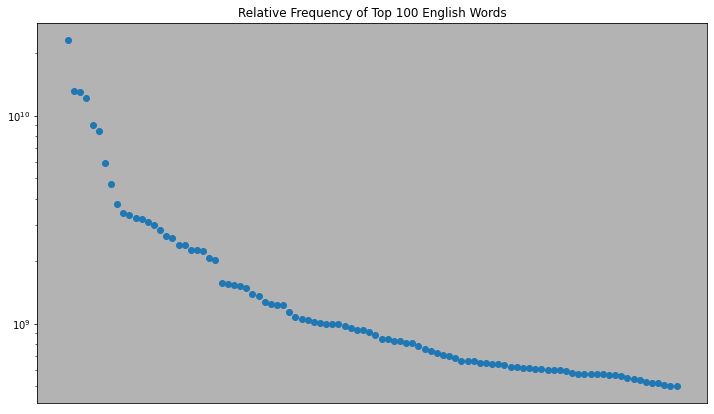

In [34]:
# Let's investigate the relative frequencies of the top 100 most frequently occurring words in the English language.
# We'll do this by making a simple scatter plot.

# First, let's make a subset of our dataframe.
sub = df.head(100)

# Begin plotting.
fig, ax = plt.subplots(figsize = (12, 7))
plt.scatter(x = np.arange(100), y = sub['count'])

# Make the plot more legible by defining a logarithmic y-axis.
ax.set_yscale('log')

# Unclutter the x-axis.
ax.axes.xaxis.set_ticks([])
ax.axes.xaxis.set_ticklabels([])

# Housekeeping.
plt.gcf().set_facecolor('white')
ax.set_facecolor((0.7, 0.7, 0.7))
plt.title('Relative Frequency of Top 100 English Words')
plt.show()

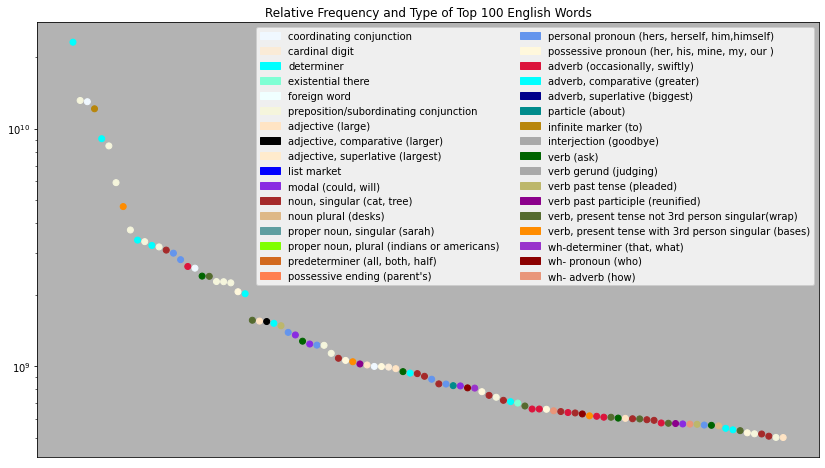

In [43]:
# That's not too bad for a first graph, but unfortunately we don't know what the words in question are, since there's no real
# way to label the bars without either cluttering up the x-axis or making the graph unreasonably huge. Instead, let's compromise
# and display what category of speech each word falls into. We'll do this by color-coding our points according to parts of speech.

# Same as before.
sub = df.head(100)

# Define a list of colors for our graph.
colors = [col_dict[pos] for pos in sub['pos']]

# Begin plotting.
fig, ax = plt.subplots(figsize = (14, 8))
plt.scatter(x = np.arange(100), y = sub['count'], color = colors)

# Create a legend.
labels = list(col_dict.keys())
handles = [plt.Rectangle((0, 0), 0, 0, color = col_dict[label]) for label in labels]
new_labels = [pos_dict[label] for label in labels]
plt.legend(handles, new_labels, ncol = 2, bbox_to_anchor = (1, 1))

# Same as before.
ax.set_yscale('log')

# Same as before.
ax.axes.xaxis.set_ticks([])
ax.axes.xaxis.set_ticklabels([])

# Same as before.
plt.gcf().set_facecolor('white')
ax.set_facecolor((0.7, 0.7, 0.7))
plt.title('Relative Frequency and Type of Top 100 English Words')
plt.show()

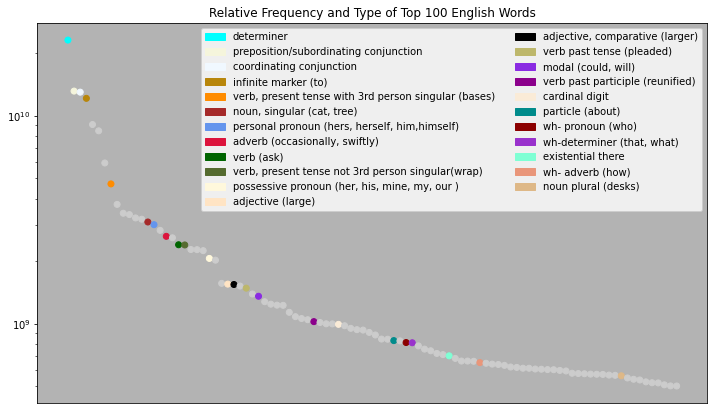

In [36]:
# Better, but it's still hard to tell what exactly is happening. The colors are all over the place, and any potential patterns
# in the distribution aren't showing up very clearly. Let's narrow our sights further and highlight only the *first* word that
# appears for a particular category. Also, let's clean up our legend so that only word types that actually appear in the graph
# are listed.

# Same as before.
sub = df.head(100)

# Define a list of colors for our graph. This time, we'll only assign unique colors to the first occurrence of each word type.
colors = []
appeared = []
for pos in sub['pos']:
  if pos in appeared:
    colors.append((0.8, 0.8, 0.8))
  else:
    colors.append(col_dict[pos])
    appeared.append(pos)

# Begin plotting.
fig, ax = plt.subplots(figsize = (12, 7))
plt.scatter(x = np.arange(100), y = sub['count'], color = colors)

# Create a legend.
handles = [plt.Rectangle((0, 0), 0, 0, color = col_dict[label]) for label in appeared]
new_labels = [pos_dict[label] for label in appeared]
plt.legend(handles, new_labels, ncol = 2, bbox_to_anchor = (1, 1))

# Same as before.
ax.set_yscale('log')

# Same as before.
ax.axes.xaxis.set_ticks([])
ax.axes.xaxis.set_ticklabels([])

# Same as before.
plt.gcf().set_facecolor('white')
ax.set_facecolor((0.7, 0.7, 0.7))
plt.title('Relative Frequency and Type of Top 100 English Words')
plt.show()

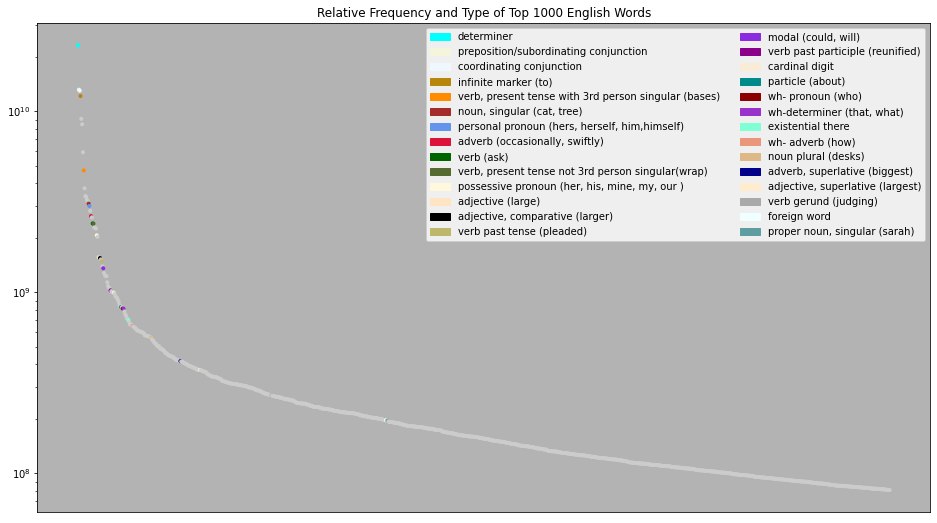

In [44]:
# This looks a lot cleaner, but unfortunately, no obvious patterns are jumping out. Let's check to see if this continues to be the
# case even with a larger sample size.

# Same as before.
sub = df.head(1000)

# Same as before.
colors = []
appeared = []
for pos in sub['pos']:
  if pos in appeared:
    colors.append((0.8, 0.8, 0.8))
  else:
    colors.append(col_dict[pos])
    appeared.append(pos)

# Begin plotting.
fig, ax = plt.subplots(figsize = (16, 9))
plt.scatter(x = np.arange(1000), y = sub['count'], color = colors, s = 9)

# Create a legend.
handles = [plt.Rectangle((0, 0), 0, 0, color = col_dict[label]) for label in appeared]
new_labels = [pos_dict[label] for label in appeared]
plt.legend(handles, new_labels, ncol = 2, bbox_to_anchor = (1, 1))

# Same as before.
ax.set_yscale('log')

# Same as before.
ax.axes.xaxis.set_ticks([])
ax.axes.xaxis.set_ticklabels([])

# Same as before.
plt.gcf().set_facecolor('white')
ax.set_facecolor((0.7, 0.7, 0.7))
plt.title('Relative Frequency and Type of Top 1000 English Words')
plt.show()

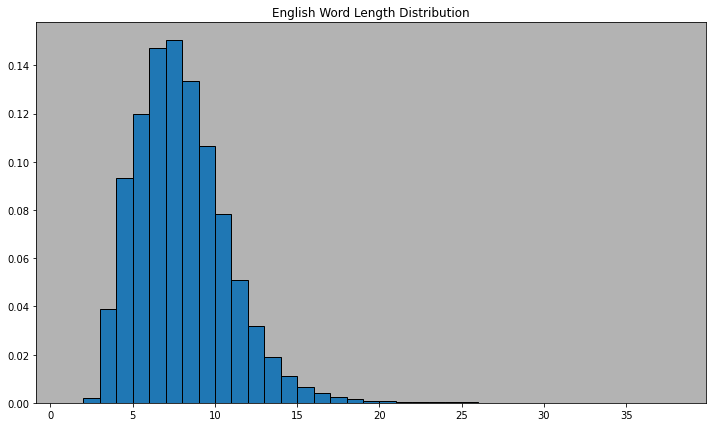

In [38]:
# It appears that the first appearance of each category is clustered towards the beginning of the distribution, but this
# is more or less to be expected--it would be the case of random data as well. What's more interesting is the extent to which
# this *isn't* true; for example, there are 28 categories that appear in the above chart, and if the data was uniformly
# distributed you would expect all 28 to appear relatively early on, e.g. within the first ~100 entries. However, we see
# colored points nearly 400 places down the list, indicating that some categories are likely far rarer than others.

# Let's now pivot from exploring the distribution of word types, and focus more on exploring the relationship between word
# frequency and word *length*. First, let's plot the distribution of word lengths to begin with. We'll do this using a histogram.

# Begin plotting.
fig, ax = plt.subplots(figsize = (12, 7))
plt.hist(x = df['length'], bins = len(df['length'].value_counts()), density = True, edgecolor = 'k')

# Same as before.
plt.gcf().set_facecolor('white')
ax.set_facecolor((0.7, 0.7, 0.7))
plt.title('English Word Length Distribution')
plt.show()

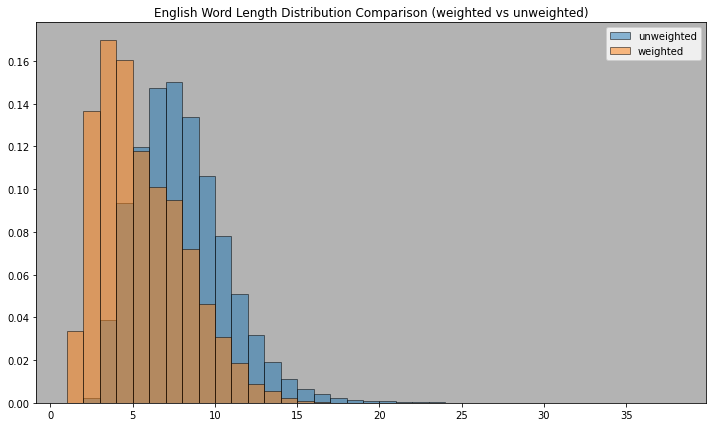

In [42]:
# It appears that the distribution of English word length is heavily right-skewed, which is to be expected, since
# there are many extremely long words (e.g. 'antidisestablishmentarianism') that are rarely used. However, I'm curious
# to see if weighting words by their *frequency* has an appreciable effect on the distribution of their lengths. My
# hypothesis is that shorter words should appear more often, and if this is true, it should mean that the weighted
# distribution is shifted to the left, compared to the unweighted version. Let's see if this is true.

# Begin plotting.
fig, ax = plt.subplots(figsize = (12, 7))
ax.hist(df['length'], bins = len(df['length'].value_counts()), density = True, edgecolor = 'k', alpha = 0.5, label = 'unweighted')
ax.hist(df['length'], bins = len(df['length'].value_counts()), weights = df['count'], density = True, edgecolor = 'k', alpha = 0.5, label = 'weighted')
plt.legend(loc = 'upper right')

# Same as before.
plt.gcf().set_facecolor('white')
ax.set_facecolor((0.7, 0.7, 0.7))
plt.title('English Word Length Distribution Comparison (weighted vs unweighted)')
plt.show()